<a href="https://colab.research.google.com/github/OjChi/DS-Lab/blob/main/Lab_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment 1: Linear Regression
Name: Ojasa Chitre


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from prettytable import PrettyTable

Outcomes:

1. To learn how to define, fit, and use a model in Python

2. To interpret the results

####Data:
**Title: Auto-Mpg Data**

Attribute Information:

mpg: continuous<br>
cylinders: multi-valued discrete<br>
displacement: continuous<br>
horsepower: continuous<br>
weight: continuous<br>
acceleration: continuous<br>
model year: multi-valued discrete<br>
origin: multi-valued discrete<br>
car name: string (unique for each instance)<br>

##Step 1: Loading the dataset

In [4]:
auto_data = pd.read_csv("/content/drive/MyDrive/Sem8/DS/Lab/auto-mpg.csv")

In [5]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


##Step 2: Data Preprocessing

In [7]:
auto_data['horsepower'] = auto_data['horsepower'].astype(str)

There are certain categorical and non-categorical

In [8]:
categorical_columns = []
for col in auto_data.columns:
  if np.issubdtype(auto_data[col].dtype,object):
    print('\nCategorical')
    print(col,auto_data[col].mode()[0])
    # horse_data[col] = horse_data[col].fillna(horse_data[col].mode()[0])
    auto_data[col].replace({"?": auto_data[col].mode()[0]}, inplace=True)
    categorical_columns.append(col)
    
  else:
    print('\nNon-categorical')
    print(col,auto_data[col].mean())
    auto_data[col] = auto_data[col].fillna(auto_data[col].median())


Non-categorical
mpg 23.514572864321615

Non-categorical
cylinders 5.454773869346734

Non-categorical
displacement 193.42587939698493

Categorical
horsepower 150

Non-categorical
weight 2970.424623115578

Non-categorical
acceleration 15.568090452261291

Non-categorical
model year 76.01005025125629

Non-categorical
origin 1.5728643216080402

Categorical
car name ford pinto


In [9]:
auto_data['horsepower'].astype(str).astype(int)

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: int64

In [10]:
labelencoder = preprocessing.LabelEncoder()

for col in categorical_columns:
  auto_data[col] = labelencoder.fit_transform(auto_data[col])

In [11]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.1 KB


##Step 3: EDA

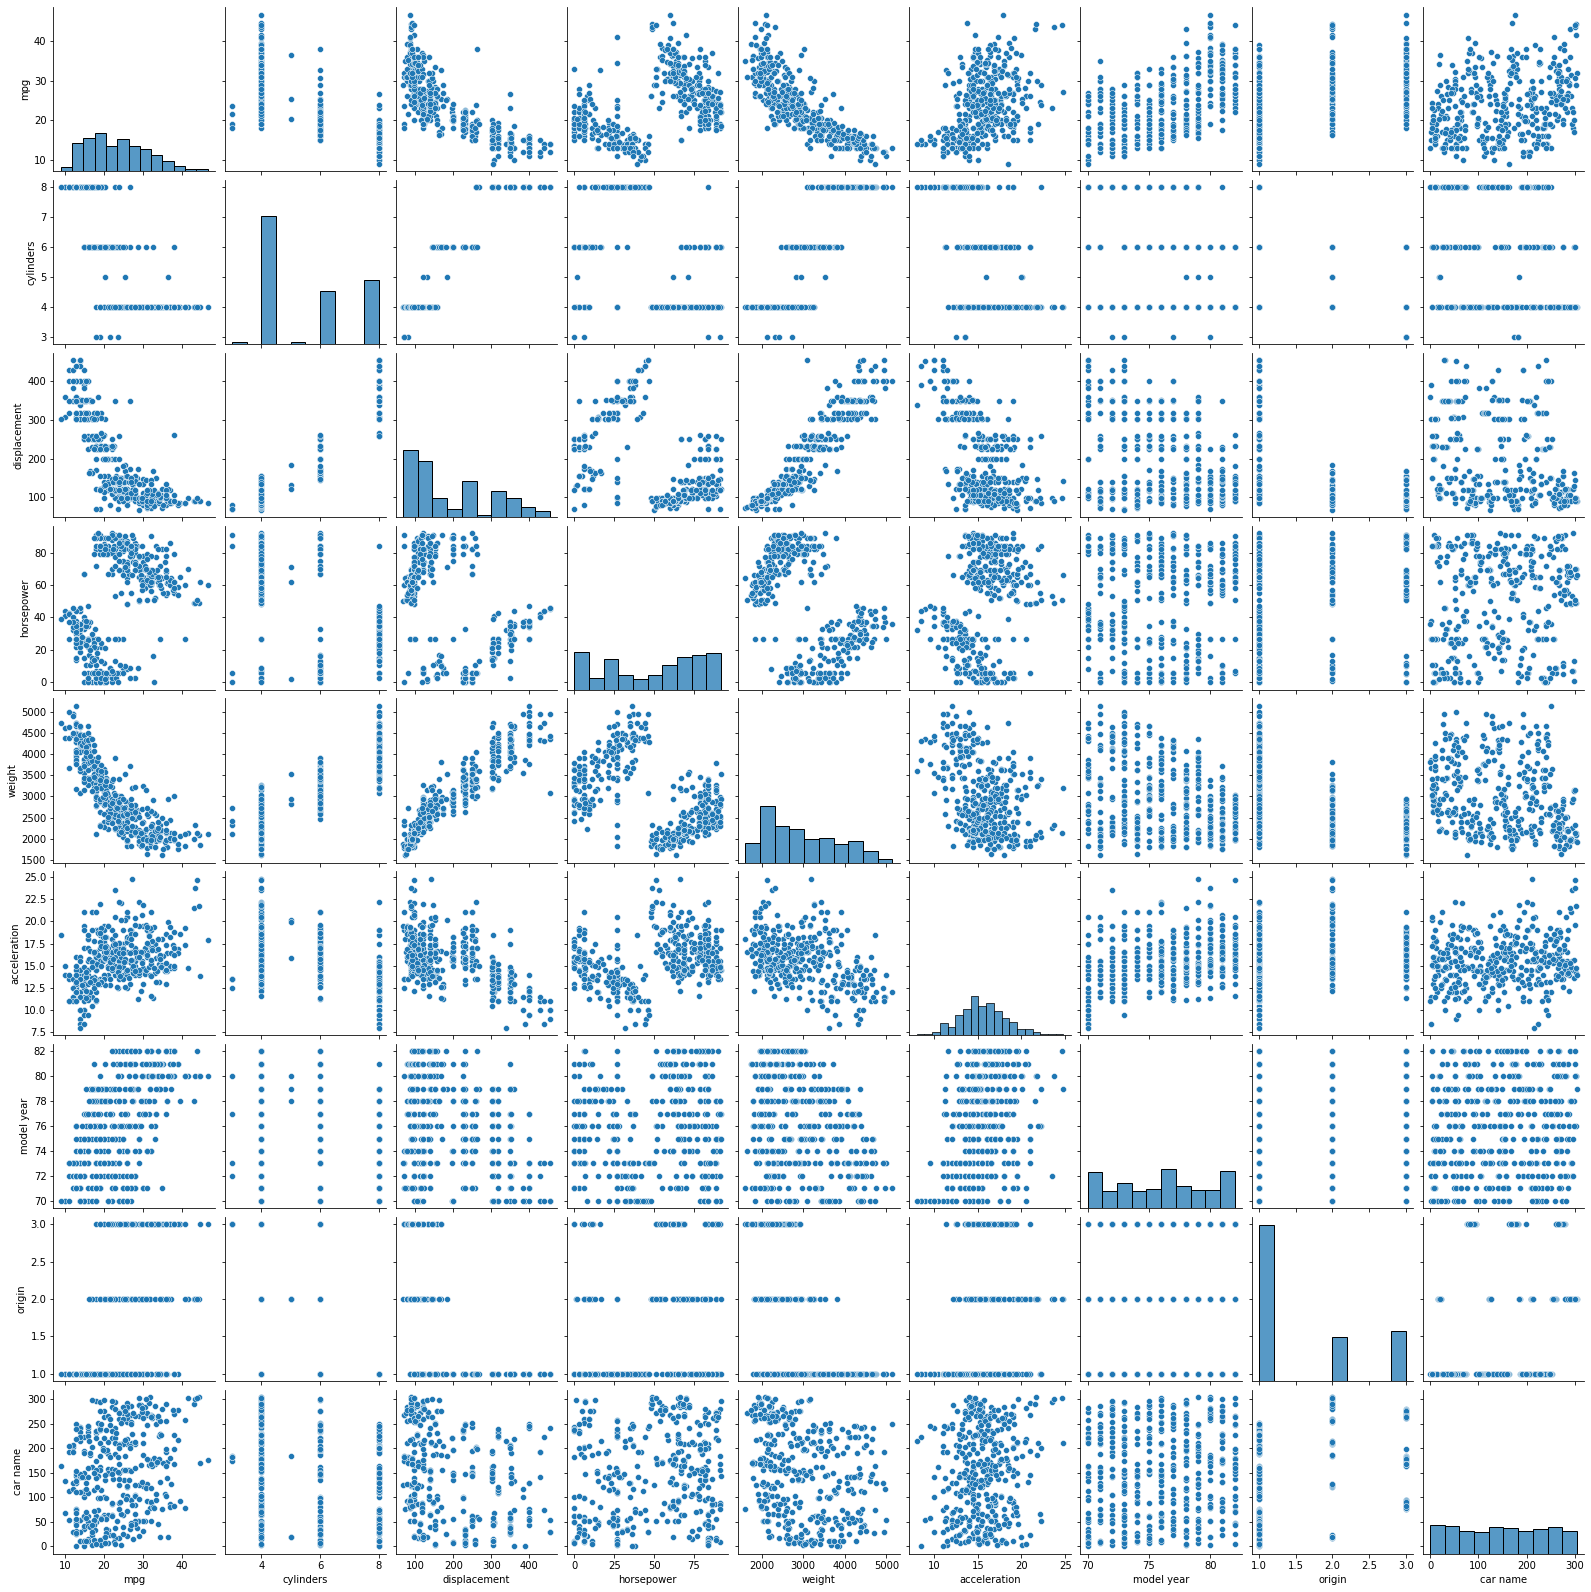

In [12]:
sns.pairplot(auto_data) 

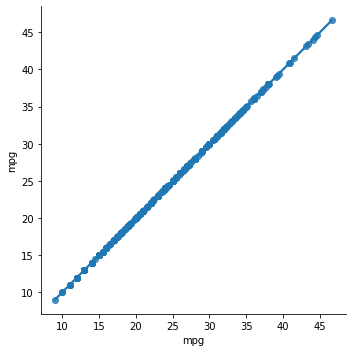

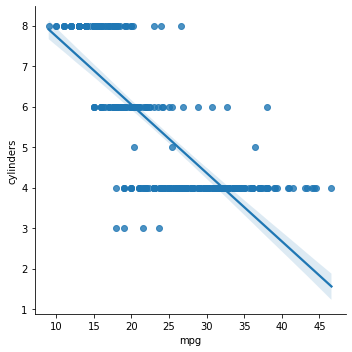

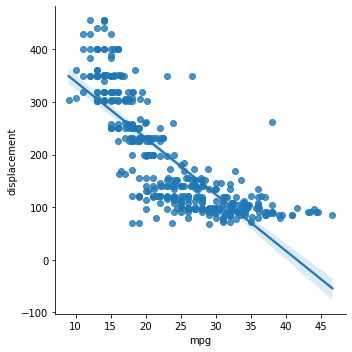

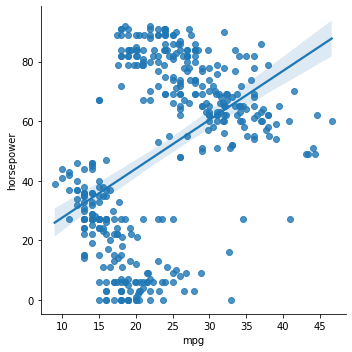

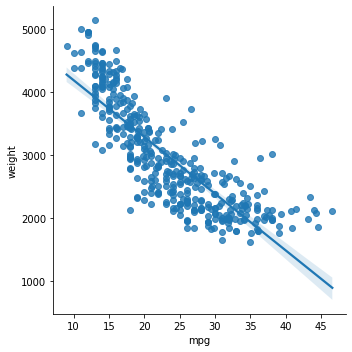

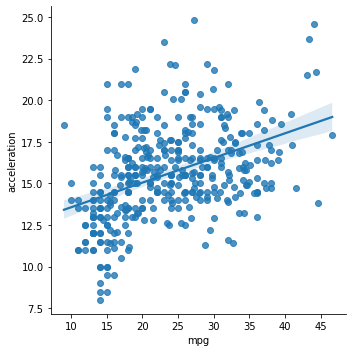

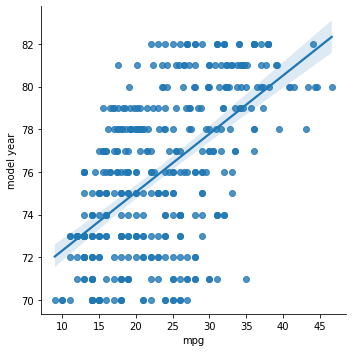

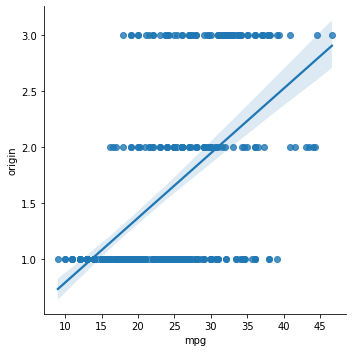

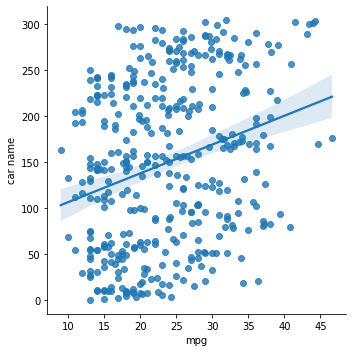

In [13]:
for col in auto_data.columns:
  sns.lmplot(x='mpg',y=col, data=auto_data)
  plt.show()

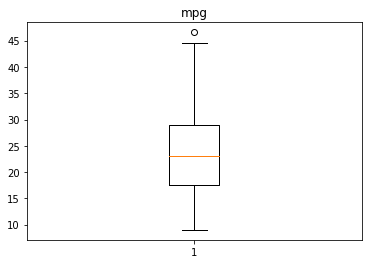

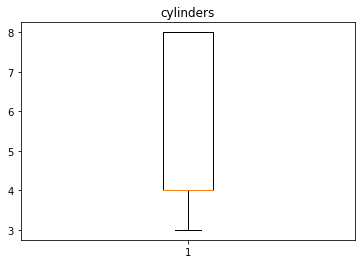

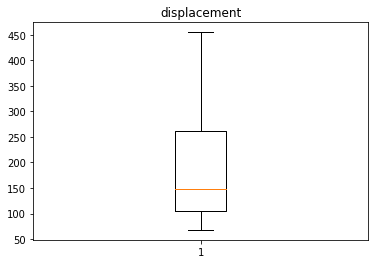

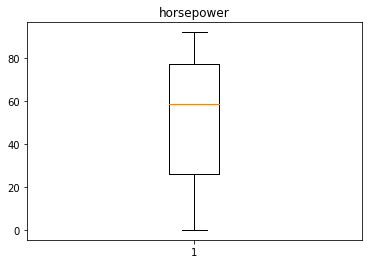

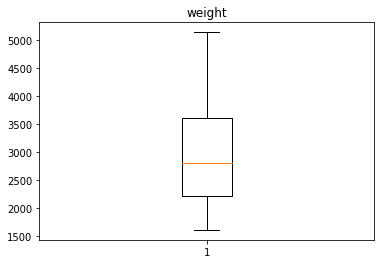

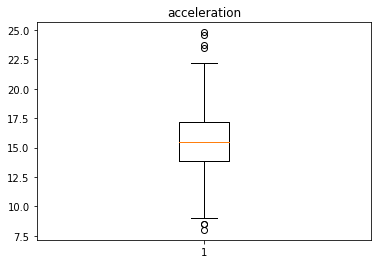

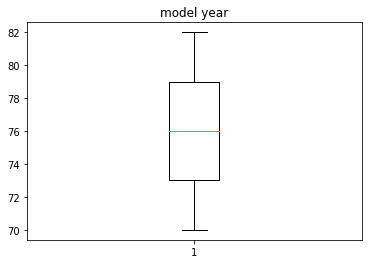

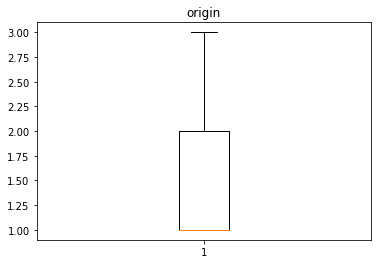

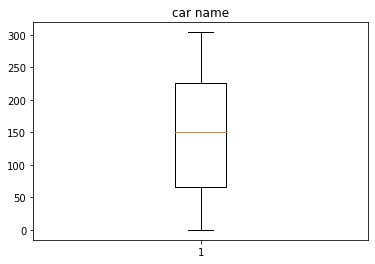

In [14]:
for col in auto_data.columns:
  plt.boxplot(auto_data[col])
  plt.title(col)
  plt.show()

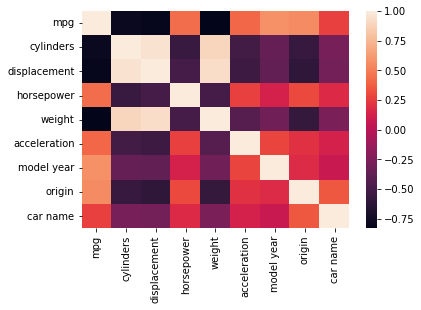

In [15]:
sns.heatmap(auto_data.corr())

In [16]:
auto_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
mpg,1.000000,-0.775396,-0.804203,0.437325,-0.831741,0.420289,0.579267,0.563450,0.273936
cylinders,-0.775396,1.000000,0.950721,-0.559640,0.896017,-0.505419,-0.348746,-0.562543,-0.275754
displacement,-0.804203,0.950721,1.000000,-0.495896,0.932824,-0.543684,-0.370164,-0.609409,-0.292064
horsepower,0.437325,-0.559640,-0.495896,1.000000,-0.497223,0.270335,0.129519,0.300165,0.170821
weight,-0.831741,0.896017,0.932824,-0.497223,1.000000,-0.417457,-0.306564,-0.581024,-0.255247
acceleration,0.420289,-0.505419,-0.543684,0.270335,-0.417457,1.000000,0.288137,0.205873,0.128285
model year,0.579267,-0.348746,-0.370164,0.129519,-0.306564,0.288137,1.000000,0.180662,0.074761
origin,0.563450,-0.562543,-0.609409,0.300165,-0.581024,0.205873,0.180662,1.000000,0.360058
car name,0.273936,-0.275754,-0.292064,0.170821,-0.255247,0.128285,0.074761,0.360058,1.000000


In [17]:
#@title Outlier removal not needed
# # calculate summary statistics
# number_of_columns_dropped = 0
# for col in auto_data.columns:
#     data_mean, data_std = np.mean(auto_data[col]), np.std(auto_data[col])
#     # identify outliers
#     cut_off = data_std * 3
#     lower, upper = data_mean - cut_off, data_mean + cut_off
    
#     print(f'\nDropping from {col} - Lower {lower} and Upper {upper}')

#     # identify outliers
#     outliers = [x for x in auto_data[col] if x < lower or x > upper]

#     for ind in auto_data.index:
#     #     print(df['Name'][ind], df['Stream'][ind])
#         if auto_data[col][ind] < lower or auto_data[col][ind] > upper:
#             print(f'{auto_data[col][ind]}')
#             auto_data.drop(ind,inplace=True)
#             number_of_columns_dropped+=1

##Step 4: Data Partition

In [18]:
X = auto_data.drop(['mpg'],axis=1)
y = auto_data['mpg']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Step 5: Build Model

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=False)
poly.fit(X_train)
X_train=pd.DataFrame(poly.transform(X_train))
X_test=pd.DataFrame(poly.transform(X_test))

In [21]:
LinReg = LinearRegression()

##Step 6: Summarize the model

In [22]:
LinReg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [23]:
LinReg.fit(X_train,y_train)

LinearRegression()

##Step 7: Prediction

In [24]:
predictions = LinReg.predict(X_test)

##Step 8: Evaluation

In [25]:
score = LinReg.score(X_test, y_test)
print(score)

0.8827151639430021


In [26]:
score = LinReg.score(X_train, y_train)
print(score)

0.8941282823050852


##Step 9: Tuning Model

In [27]:
x = PrettyTable()

x.field_names = ["Predicted", "Actual", "Difference"]

In [28]:
mse = 0

for i,j in zip(predictions,y_test):
  mse += (i-j)**2
  x.add_row([i,j,abs(i-j)])

mse = (mse / len(predictions))**0.5

In [29]:
mse

2.5111727420841743

In [30]:
auto_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,49.811558,2970.424623,15.568090,76.010050,1.572864,148.550251
std,7.815984,1.701004,104.269838,29.410363,846.841774,2.757689,3.697627,0.802055,89.495880
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.250000,26.250000,2223.750000,13.825000,73.000000,1.000000,65.250000
50%,23.000000,4.000000,148.500000,58.500000,2803.500000,15.500000,76.000000,1.000000,150.000000
75%,29.000000,8.000000,262.000000,77.000000,3608.000000,17.175000,79.000000,2.000000,225.750000
max,46.600000,8.000000,455.000000,92.000000,5140.000000,24.800000,82.000000,3.000000,304.000000


Test<br>
0.8827151639430021

Train<br>
0.8941282823050852

##Conclusion:
1. I was able to understand how to apply Linear regression on a given dataset
2. I was able to understand how to preprocess data for using Linear regression
3. I was able to interpret visualization of data.